In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN,  SpectralClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [6]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [7]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [8]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [9]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [10]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [11]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the silhouette

In [12]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        #color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, cmap= "plasma", edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

function to visualize the results

In [13]:
def visualizeResults(df, data_scaled, model, team, silhouetteTitle):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')

    title = "Clustering of Jungle Player Deaths " + team + "\n"
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    drawSillouette(data_scaled, model.labels_, silhouetteTitle)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))

function to view the average values in each cluster

In [14]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

---
### Clustering Red Side Junglers

In [15]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633
275722,6544.0,14078.0,32.611683
275750,5575.0,8675.0,12.166683


In [16]:
redSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 5915 to 275757
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  2359 non-null   float64
 1   coordinate_y  2359 non-null   float64
 2   timestamp     2359 non-null   float64
dtypes: float64(3)
memory usage: 73.7 KB


Normalize Data:

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[ 0.16954961,  0.1390794 , -1.3033296 ],
       [ 0.6896899 ,  0.24016264,  0.08240096],
       [-0.47575499,  1.18854419,  0.65402548],
       ...,
       [-0.34468672,  2.00505278,  1.98634591],
       [-0.63073436,  0.43564834, -0.51025139],
       [ 0.19936468, -0.51069993, -0.26329849]])

#### K-Medoids:

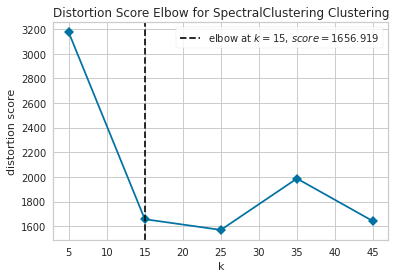

<AxesSubplot:title={'center':'Distortion Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#150
ks = np.arange(5,50, 10)
model = SpectralClustering()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [20]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    spectral = SpectralClustering(n_clusters=k, random_state=42)
    spectral.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, spectral.labels_)))

Silhouette score for k=2: 0.2867661867000565
Silhouette score for k=3: 0.29208313099854566
Silhouette score for k=4: 0.21100672740704257
Silhouette score for k=5: 0.22499351813747756
Silhouette score for k=6: 0.2128169304363382
Silhouette score for k=7: 0.2402166770834518
Silhouette score for k=8: 0.24731529120089008
Silhouette score for k=9: 0.2506252639506073
Silhouette score for k=10: 0.24914879632957748
Silhouette score for k=11: 0.23513853400402948
Silhouette score for k=12: 0.23035124919168384
Silhouette score for k=13: 0.21992978614299608
Silhouette score for k=14: 0.19531062280438158
Silhouette score for k=15: 0.19139819536659994
Silhouette score for k=16: 0.16033272512013774
Silhouette score for k=17: 0.17087122882562217
Silhouette score for k=18: 0.16053340378297196
Silhouette score for k=19: 0.17658020661573712
Silhouette score for k=20: 0.15335833474337363
Silhouette score for k=25: 0.10725737260538368


---
### Clustering Blue Side Junglers

In [45]:
blueSide_jungler_deaths_df = blueSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSide_jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
6199,11330.0,10690.0,20.334733
6474,8030.0,5198.0,3.296667
6482,6387.0,9619.0,7.523067
6489,4626.0,9854.0,11.265733
6492,13593.0,3353.0,13.005150
...,...,...,...
275292,6292.0,10252.0,14.535800
275301,13350.0,7182.0,17.230867
275359,12331.0,4912.0,6.853167
275380,6006.0,6468.0,17.374817


In [46]:
blueSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 6199 to 275395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  1896 non-null   float64
 1   coordinate_y  1896 non-null   float64
 2   timestamp     1896 non-null   float64
dtypes: float64(3)
memory usage: 59.2 KB


Normalize Data:

In [47]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSide_jungler_deaths_df)
data_scaled

array([[ 1.1217524 ,  1.10456358,  0.4473367 ],
       [ 0.19192986, -0.53131501, -1.60670849],
       [-0.27100906,  0.78554938, -1.09718961],
       ...,
       [ 1.40379858, -0.61650461, -1.17795023],
       [-0.3783613 , -0.15302553,  0.09050029],
       [-1.2309804 ,  1.35953664,  1.05954136]])

#### K-Medoids:

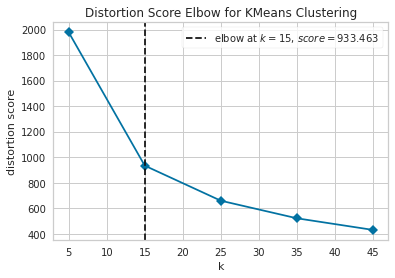

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
#150
ks = np.arange(5,50, 10)
model = SpectralClustering()
visualizer = KElbowVisualizer(model, k=ks, timings=False)

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [49]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    spectral = SpectralClustering(n_clusters=k, random_state=42)
    spectral.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, spectral.labels_)))

Silhouette score for k=2: 0.3007699146374019
Silhouette score for k=3: 0.3017554934562529
Silhouette score for k=4: 0.3152505017126149
Silhouette score for k=5: 0.2916179219256141
Silhouette score for k=6: 0.28029966417069163
Silhouette score for k=7: 0.2866100132909996
Silhouette score for k=8: 0.2842692107844882
Silhouette score for k=9: 0.2733309162919033
Silhouette score for k=10: 0.2732638660017032
Silhouette score for k=11: 0.26915322655632423
Silhouette score for k=12: 0.275792545811434
Silhouette score for k=13: 0.265709981369332
Silhouette score for k=14: 0.2537453344518966
Silhouette score for k=15: 0.25570365528368094
Silhouette score for k=16: 0.2477121360694883
Silhouette score for k=17: 0.24954948549626135
Silhouette score for k=18: 0.25084401021816527
Silhouette score for k=19: 0.25232111715957733
Silhouette score for k=20: 0.2530922901191035
Silhouette score for k=25: 0.25690636606377737


---
### Clustering Junglers

In [ ]:
jungler_deaths_df = jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
jungler_deaths_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633
275722,6544.0,14078.0,32.611683
275750,5575.0,8675.0,12.166683


Normalize Data:

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(jungler_deaths_df)
data_scaled

array([[ 0.2124081 ,  0.16587514, -1.31075147],
       [ 0.72090051,  0.2680407 ,  0.06682875],
       [-0.4184457 ,  1.22657676,  0.63509118],
       ...,
       [-0.29031254,  2.05182786,  1.95957541],
       [-0.56995451,  0.46561949, -0.52233784],
       [ 0.24155551, -0.49086151, -0.27683743]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    spectral = SpectralClustering(n_clusters=k, random_state=42)
    spectral.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, spectral.labels_)))

Silhouette score for k=2: 0.29524926958198144
Silhouette score for k=3: 0.29512110278721965
Silhouette score for k=4: 0.3172508734259316
Silhouette score for k=5: 0.2837226507695443
Silhouette score for k=6: 0.27905333585386266
Silhouette score for k=7: 0.27921344249992147
Silhouette score for k=8: 0.2702689456773491
Silhouette score for k=9: 0.27051382469494595
Silhouette score for k=10: 0.2667461768748599
Silhouette score for k=11: 0.26840006113890225
Silhouette score for k=12: 0.2664504381415582
Silhouette score for k=13: 0.2617898539384805
Silhouette score for k=14: 0.2509579668733163
Silhouette score for k=15: 0.25352035029796843
Silhouette score for k=16: 0.24953479038090523
Silhouette score for k=17: 0.24353232891669693
Silhouette score for k=18: 0.2500659010874679
Silhouette score for k=19: 0.2469887122996672
Silhouette score for k=20: 0.24988545629421546
Silhouette score for k=25: 0.2561428970857673
